# Unit 2 Capstone

### Loading Data File

In [39]:
import os
import pandas as pd

def housePrice_data():
    return pd.read_excel("House_Price_Train_Data.xlsx")
df = housePrice_data()

print(df.head())


   MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    Inside       Gtl      CollgCr  ...          61             0         0   
1       FR2       Gtl      Veenker  ...           0             0         0   
2    Inside       Gtl      CollgCr  ...          42             0         0   
3    Corner       Gtl      Crawfor  ...          35           272         0   
4       FR2       Gtl      NoRidge  ...          84             0         0   

  ScreenPorch  MiscVal  MoSold  YrSold  SaleType SaleCondition SalePrice  
0          

In [7]:
print(df.shape)

(1460, 80)


In [10]:
print(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'is

### Simple Linear Regression

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          2.19e-313
Time:                        23:30:52   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      

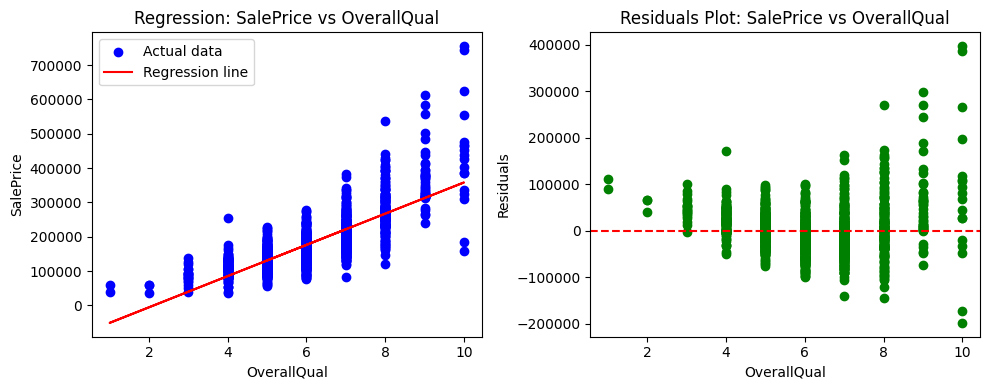

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm

df = housePrice_data()

x = df[['OverallQual']]
y = df['SalePrice']

x = sm.add_constant(x)  # Adds a constant term to the predictor
model = sm.OLS(y, x).fit()

print(model.summary())


# Predict and compute residuals
y_pred = model.predict(x)  # x should be df['OverallQual']
residuals = y - y_pred

# Create 1 row, 2 column subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # Adjust width/height as needed

# Plot 1: Regression
axs[0].scatter(df['OverallQual'], y, color='blue', label='Actual data')
axs[0].plot(df['OverallQual'], y_pred, color='red', label='Regression line')
axs[0].set_xlabel('OverallQual')
axs[0].set_ylabel('SalePrice')
axs[0].set_title('Regression: SalePrice vs OverallQual')
axs[0].legend()

# Plot 2: Residuals
axs[1].scatter(df['OverallQual'], residuals, color='green')
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_xlabel('OverallQual')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residuals Plot: SalePrice vs OverallQual')

# Improve layout
plt.tight_layout()
plt.show()


### Result Explanations

**Adjusted R-squared** tells us that the explanatory variable OverallQual explains 62% of the variance in the dependent variable SalePrice.

**p-value (2.19e-313)** for the F-statistic is less than 0.05, meaning the model is overall statistically significant, indicating a significant relationship between the dependent variable SalePrice and the independent variable OverallQual.

**Coefficient of OverallQual 45440** means that for each one-unit increase in OverallQual (a higher quality score), the SalePrice increases by 45,440 dollars, indicating a positive value; this suggests that higher-quality homes tend to have a higher sale price.

**Intercept (const) -96,210.50** means that if OverallaQual is zero or the lowest quality house, the price would be -96,210.50, although a sale price below 0 is not meaningful in the real world.

**p-value zero for both coefficients** indicates that the predictor is statistically significant at the 95% level; this allows us to reject the null hypothesis that the coefficient equals zero.

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load data
df = housePrice_data()

# Select independent variables (4 continuous + 1 binary)
X = df[['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'YearBuilt', 'is_paved', 'is_parpaved']]  # 4 continuous + 1 binary variable

# Dependent variable
y = df['SalePrice']  # Dependent variable

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the regression model using statsmodels
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF results
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     682.4
Date:                Sun, 22 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:31:03   Log-Likelihood:                -17566.
No. Observations:                1460   AIC:                         3.515e+04
Df Residuals:                    1453   BIC:                         3.518e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.001e+06   8.95e+04    -11.185   

**The R-squared value of 0.738** indicates that approximately 73.8% of the variance in SalePrice is explained by the model. This suggests a strong fit, meaning the model captures a significant portion of the variability in the dependent variable. While it's not a perfect fit, it does reflect that the model performs well overall. In general, a higher R-squared value implies that the model better explains the variation in the outcome.

**The Adjusted R-squared value of 0.737** accounts for the number of predictors used in the model. Since it is very close to the regular R-squared value (0.738), it indicates that the model is robust and that the number of predictors included is appropriate. This suggests that the model is not overfitting and that the added variables contribute meaningfully to explaining the variance in SalePrice.

The **F-statistic of 682.4** and **Probability close to 0.00** indicate that the overall model is a good fit for the data. A high F-statistic combined with a p-value close to zero means the model is statistically significant, suggesting that at least one of the independent variables is a meaningful predictor of SalePrice. This supports the reliability of the model as a whole.

The **intercept value of -1.001e+06 (or -1,001,000)** represents the estimated SalePrice when all predictor variables are equal to zero. Although this scenario is unlikely in practical terms—since having all predictors at zero may not make sense for real housing data—the intercept serves as a baseline within the model. It is primarily a mathematical anchor point and is not typically interpreted as a meaningful standalone value in applied settings.

The **coefficient for OverallQual is 25,110**, indicating that for each one-unit increase in the overall quality of the house, the SalePrice increases by approximately 25,110, assuming all other variables remain constant. This variable is statistically significant, with a p-value of 0.000, suggesting a strong and reliable relationship between overall quality and the sale price of the house.

The **GrLivArea** variable represents the **Above Grade (Ground) Living Area** of a house, measured in square feet. The coefficient value of 66.39 indicates that for each additional square foot of living space, the SalePrice increases by approximately 66.39 units, assuming all other variables remain constant. This variable is highly statistically significant, with a p-value of 0.000, highlighting a strong and consistent relationship between living area and house price.

The **TotRmsAbvGrd** variable represents the **total number of rooms above grade**, excluding bathrooms. The coefficient of -1,608.76 suggests that each additional room is associated with a decrease in SalePrice by approximately 1,608.76, holding other variables constant. However, the p-value of 0.173 is greater than the common significance level of 0.05, indicating that this variable is not statistically significant and may not be a reliable predictor of SalePrice in the model.

The **YearBuilt** variable reflects the year the house was constructed. **YearBuilt has a coefficient of 473.52**, meaning each newer year adds about 473.52 to the SalePrice. This effect is highly significant (p-value = 0.000).

The **is_paved** variable has a coefficient of 5,584.42, suggesting that houses on paved roads sell for about 5,584.42 more. However, with a p-value of 0.251, this effect is not statistically significant.

The **is_parpaved** variable has a coefficient of -132.02, indicating a slight decrease in SalePrice for houses on partially paved roads. However, the p-value of 0.988 shows that this effect is not statistically significant.

The Variance Inflation Factor (VIF) is used to detect multicollinearity among independent variables in a regression model. High VIF values (typically above 10) suggest strong correlation with other predictors, which can distort coefficient estimates.

In this case, all **VIF** values are within acceptable limits, indicating no serious multicollinearity concerns:

- **OverallQual**: 2.33 – Low, no issue.  
- **GrLivArea**: 4.08 – Moderate, but acceptable.  
- **TotRmsAbvGrd**: 3.23 – Moderate, not problematic.  
- **YearBuilt**: 1.81 – Low, no issue.  
- **is_paved**: 1.57 – Low, no issue.  
- **is_parpaved**: 1.31 – Low, no issue.

Overall, the model appears to be **free from multicollinearity** issues based on the VIF values.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64

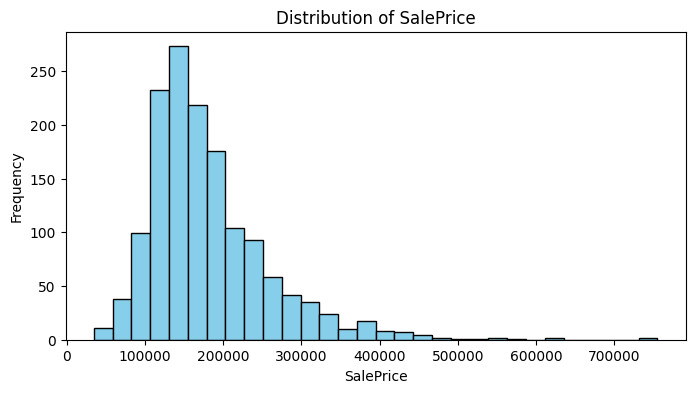

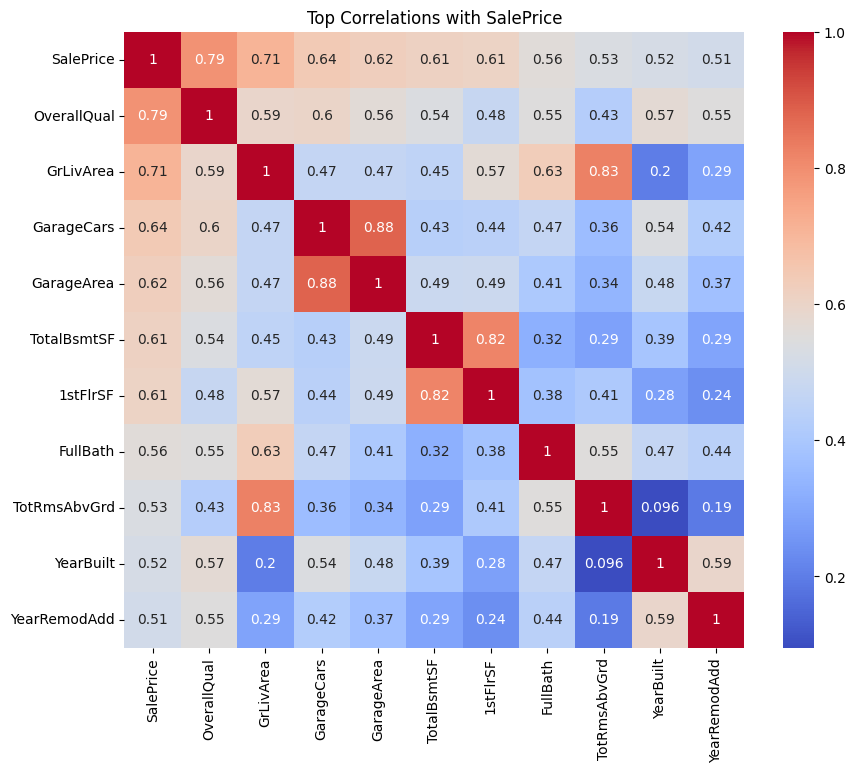

In [40]:
# %pip install seaborn
import seaborn as sns

# Exploratory Data Analysis (EDA) for House_Price_Train_Data

# Display basic info
print("DataFrame Info:")
df.info()
print("\nMissing Values:\n", df.isnull().sum().sort_values(ascending=False).head(10))

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all').T)

# Distribution of target variable
plt.figure(figsize=(8, 4))
plt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap (top 10 correlated with SalePrice)
corr = df.corr(numeric_only=True)
top_corr = corr['SalePrice'].abs().sort_values(ascending=False).head(11).index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlations with SalePrice')
plt.show()

In [19]:
# Load data
df = housePrice_data()

df['Log_SalePrice'] = np.log(df['SalePrice'])

# Select independent variables (4 continuous + 1 binary)
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]  # 4 continuous + 1 binary variable

# Dependent variable
y = df['Log_SalePrice']  # Dependent variable

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the regression model using statsmodels
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF results
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:          Log_SalePrice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1404.
Date:                Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:09:29   Log-Likelihood:                 422.71
No. Observations:                1460   AIC:                            -835.4
Df Residuals:                    1455   BIC:                            -809.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5793      0.022    489.026      

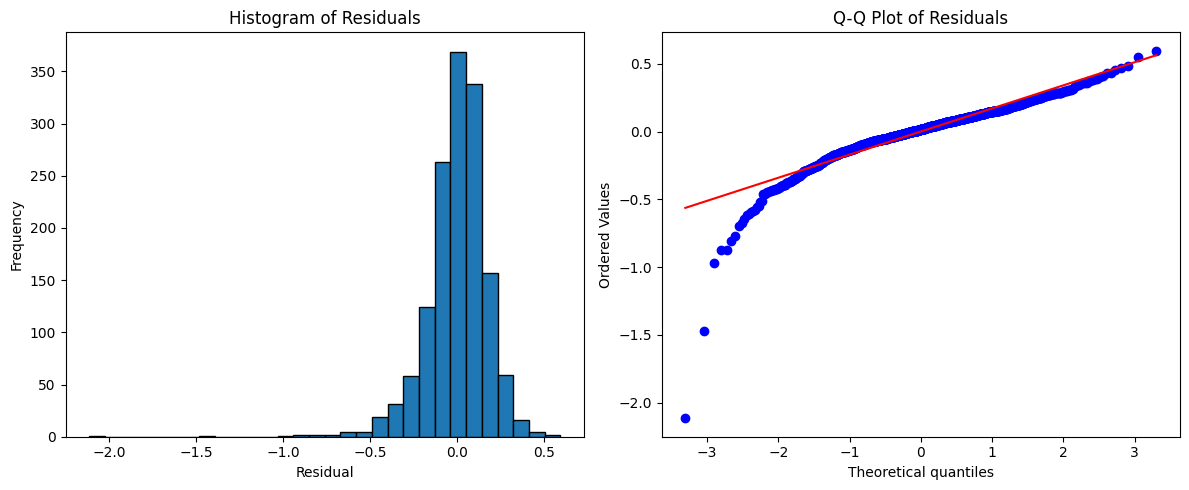

In [22]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram on the left
axes[0].hist(model.resid, bins=30, edgecolor='black')
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residual')
axes[0].set_ylabel('Frequency')

# Q-Q plot on the right
stats.probplot(model.resid, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()




**Histogram** indicates that, the residuals are not normally distributed as the histogram shows a left-skewed distribution with a long tail on the negative side. The **Q-Q plot** shows the residuals deviate from the red diagonal line, especially on the left (lower quantiles). This also means the residuals are not normally distributed — particularly too many low residuals (left tail is too heavy). So it can be decided that model violates the **normality assumption of residuals**.

In [23]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

outliers = detect_outliers_iqr(df, 'SalePrice')
print(f"Outliers in 'SalePrice': {len(outliers)}")


Outliers in 'SalePrice': 61


In [24]:
outliers = detect_outliers_iqr(df, 'SalePrice')
print(outliers[['SalePrice']])


      SalePrice
11       345000
53       385000
58       438780
112      383970
151      372402
...         ...
1268     381000
1353     410000
1373     466500
1388     377500
1437     394617

[61 rows x 1 columns]


In [25]:
# Load original data
df = housePrice_data()

# Remove outliers first
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

outliers = detect_outliers_iqr(df, 'SalePrice')
df = df[~df.index.isin(outliers.index)]  # ✅ Now df is the filtered DataFrame

# Create log-transformed dependent variable
df['Log_SalePrice'] = np.log(df['SalePrice'])

# Independent variables
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]
X = sm.add_constant(X)

# Dependent variable
y = df['Log_SalePrice']

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

# VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:          Log_SalePrice   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1021.
Date:                Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:29:55   Log-Likelihood:                 418.59
No. Observations:                1399   AIC:                            -827.2
Df Residuals:                    1394   BIC:                            -801.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.6321      0.023    457.144      